<a href="https://colab.research.google.com/github/victorluis22/metodos-numericos-otimizacao/blob/main/newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Newton

Algoritmo para minimizar funções unidimensionais usando derivadas.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plotFunction(min, max, step, resultx, resulty):
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title(f'Gráfico da função')
  plt.grid(True)

  x_values = np.arange(min, max+step, step)
  y_values = [f(x) for x in x_values]

  plt.plot(x_values, y_values, label=f'f(x)')
  plt.scatter(resultx, resulty, color='red', label=f'Mínimo')
  plt.legend()
  plt.show()

def f(x):
  function1 = "x**6 - (52/25)*x**5 + (39/80)*x**4 + (71/10)*x**3 - (79/20)*x**2 - x + (1/10)"
  function2 = "0.000089248*x - 0.0218343*x**2 + 0.998266*x**3 - 1.6995*x**4 + 0.2*x**5"
  function3 = "4*x**2 - 4*x**3 + x**4"
  function4 = "np.sin(x**2)"
  function5 = "np.sqrt(x**3)"

  return eval(function4)

def deriv_f(x, h):
  return (f(x + h) - f(x - h))/(2*h)

def deriv2_f(x, h):
  return (f(x-h) + f(x+h) - 2*f(x))/(h**2)

def newtonSearch(x):
  lmbda = x
  lmbda_next = 0
  e = 10**-6
  h = 10**-3
  time = 0

  while True:
    lmbda_next = lmbda - (deriv_f(lmbda, h) / deriv2_f(lmbda, h))

    addData(time, lmbda, lmbda_next, h)

    if abs(lmbda_next - lmbda) < e:
      return f(lmbda_next), lmbda_next
    else:
      lmbda = lmbda_next

    time += 1


def addData (time, lmbda, lmbda_next, h):
  data['Iteração'].append(time)
  data['λ'].append(lmbda)
  data['θ\'(λ)'].append(deriv_f(lmbda, h))
  data['θ\'\'(λ)'].append(deriv2_f(lmbda, h))
  data['λk+1'].append(lmbda_next)

data = {
        'Iteração': [],
        'λ': [],
        'θ\'(λ)': [],
        'θ\'\'(λ)': [],
        'λk+1': [],
}

Mínimo encontrado: f(x) = -0.9999999999995, x=2.1708035333467217



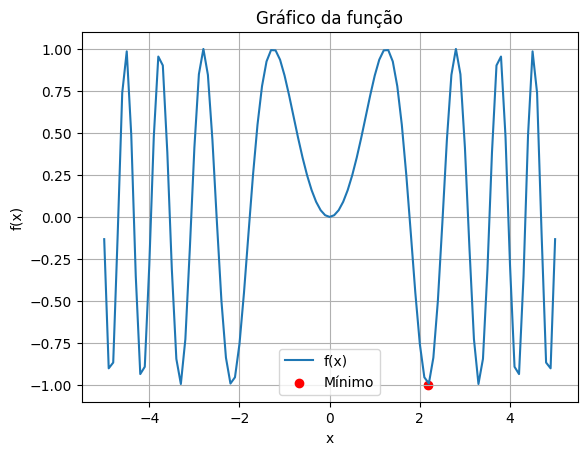

,Iteração,λ,θ'(λ),θ''(λ),λk+1
0,0,2.000000,-2.614564,10.801548,2.242055
1,1,2.242055,1.386777,19.739990,2.171802
2,2,2.171802,0.018842,18.875371,2.170804
3,3,2.170804,0.000013,18.849539,2.170804


In [7]:
a = -5
b = 5
minimun, x_minimun = newtonSearch(2)

print(f'Mínimo encontrado: f(x) = {minimun}, x={x_minimun}\n')

plotFunction(a, b, 0.1, x_minimun, minimun)

df = pd.DataFrame(data)
display(df)